In [1]:
!pip install -q umap-learn tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.1 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA, IncrementalPCA, FactorAnalysis
from sklearn.manifold import TSNE, Isomap, LocallyLinearEmbedding
import umap.umap_ as umap
import tensorflow as tf
from tensorflow.keras import layers, models

In [3]:
data = fetch_lfw_people(min_faces_per_person=50, resize=0.4)
images = data.images
X = data.data
y = data.target
target_names = data.target_names

In [4]:
print(X.shape)
print(len(np.unique(y)))

(1560, 1850)
12


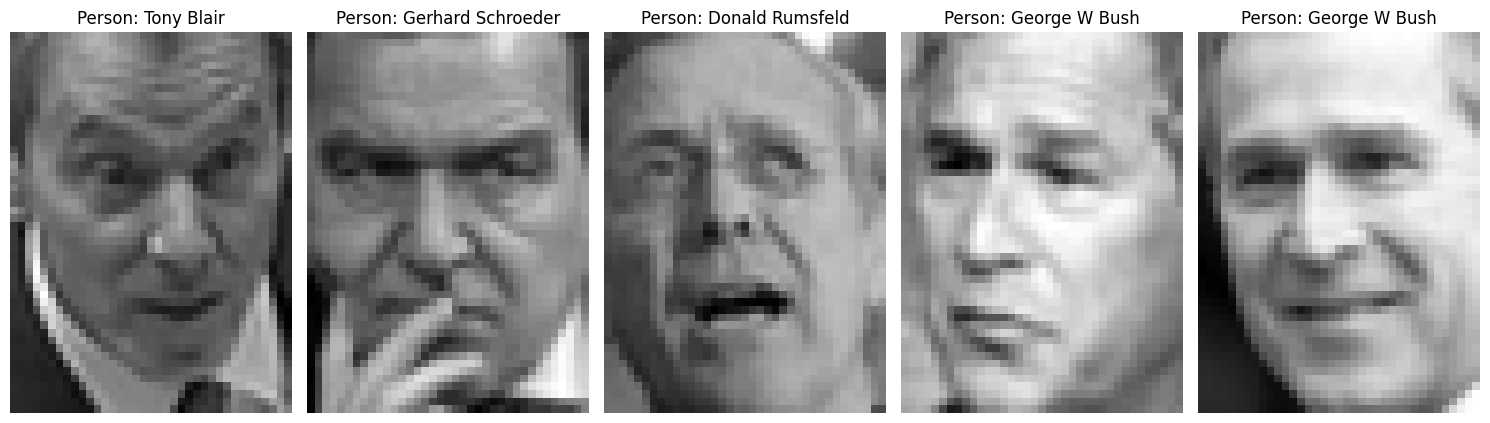

In [6]:
fig, axes = plt.subplots(1, 5, figsize=(15, 6))
for i, ax in enumerate(axes):
    ax.imshow(images[i], cmap='gray')
    ax.set_title(f"Person: {target_names[y[i]]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

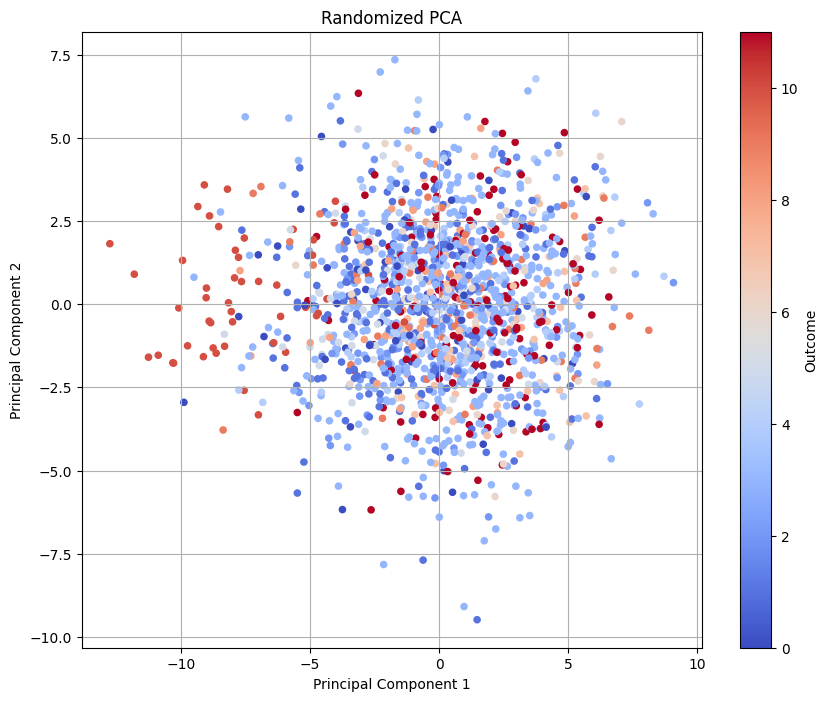

In [9]:
randomized_pca = PCA(n_components=2, svd_solver='randomized', random_state=42)
X_rpca = randomized_pca.fit_transform(X)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_rpca[:, 0], X_rpca[:, 1], c=y, cmap='coolwarm', s=20)
plt.colorbar(scatter, label="Outcome")
plt.title("Randomized PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

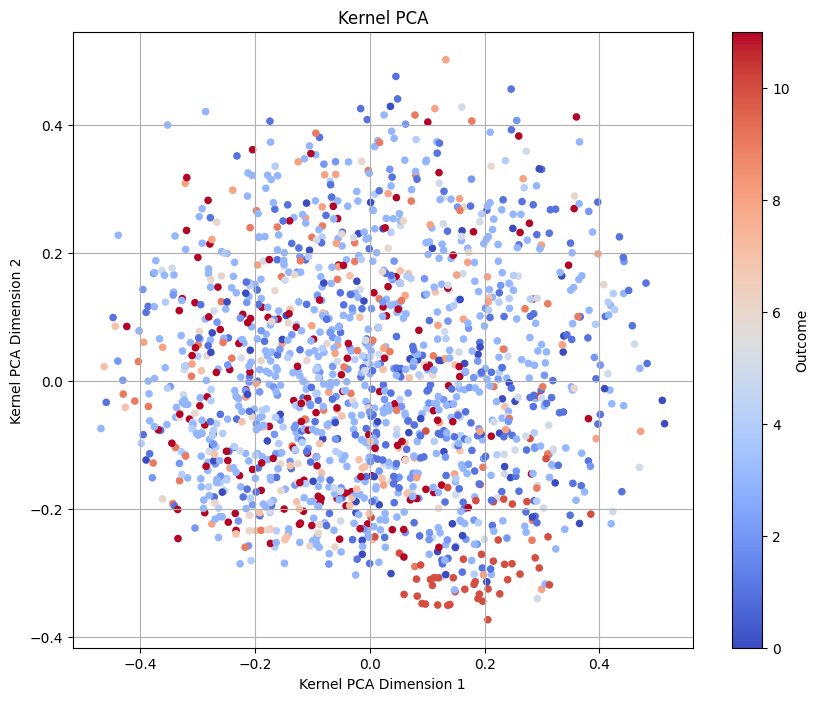

In [10]:
kernel_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.03, random_state=42)
X_kpca = kernel_pca.fit_transform(X)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y, cmap='coolwarm', s=20)
plt.colorbar(scatter, label="Outcome")
plt.title("Kernel PCA")
plt.xlabel("Kernel PCA Dimension 1")
plt.ylabel("Kernel PCA Dimension 2")
plt.grid(True)
plt.show()

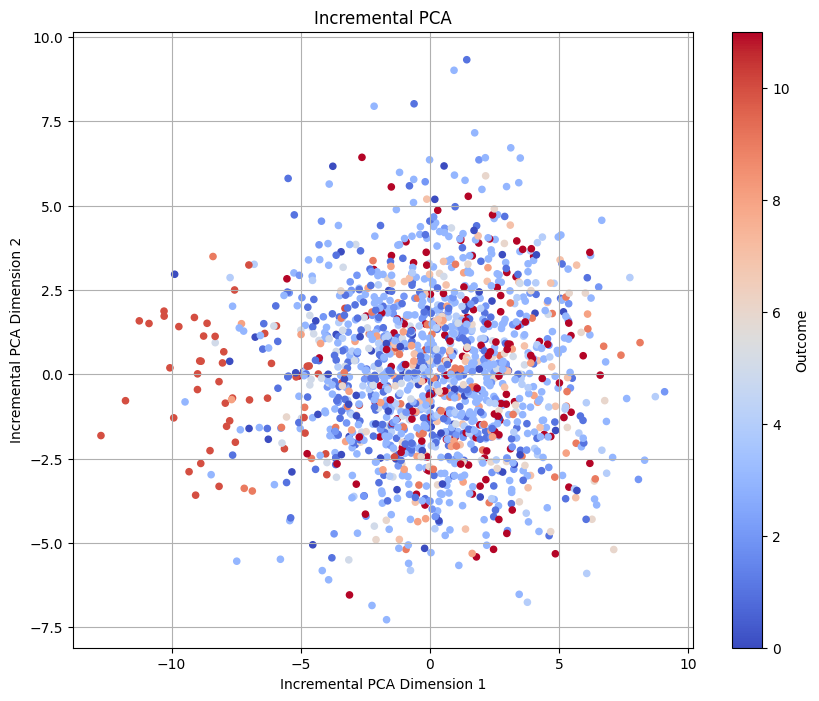

In [11]:
incremental_pca = IncrementalPCA(n_components=2, batch_size=10)
X_ipca = incremental_pca.fit_transform(X)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_ipca[:, 0], X_ipca[:, 1], c=y, cmap='coolwarm', s=20)
plt.colorbar(scatter, label="Outcome")
plt.title("Incremental PCA")
plt.xlabel("Incremental PCA Dimension 1")
plt.ylabel("Incremental PCA Dimension 2")
plt.grid(True)
plt.show()

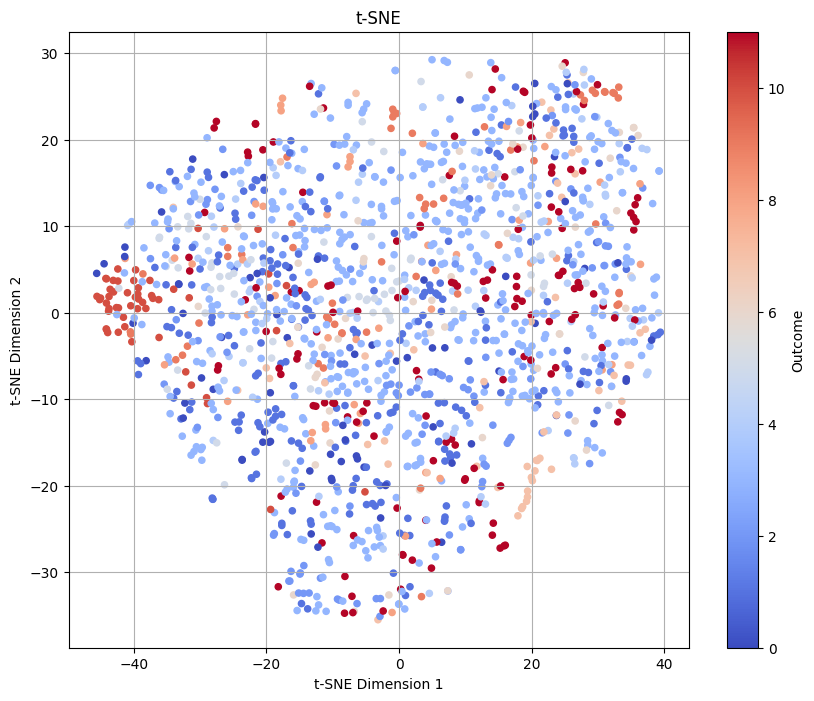

In [12]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='coolwarm', s=20)
plt.colorbar(scatter, label="Outcome")
plt.title("t-SNE")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.grid(True)
plt.show()

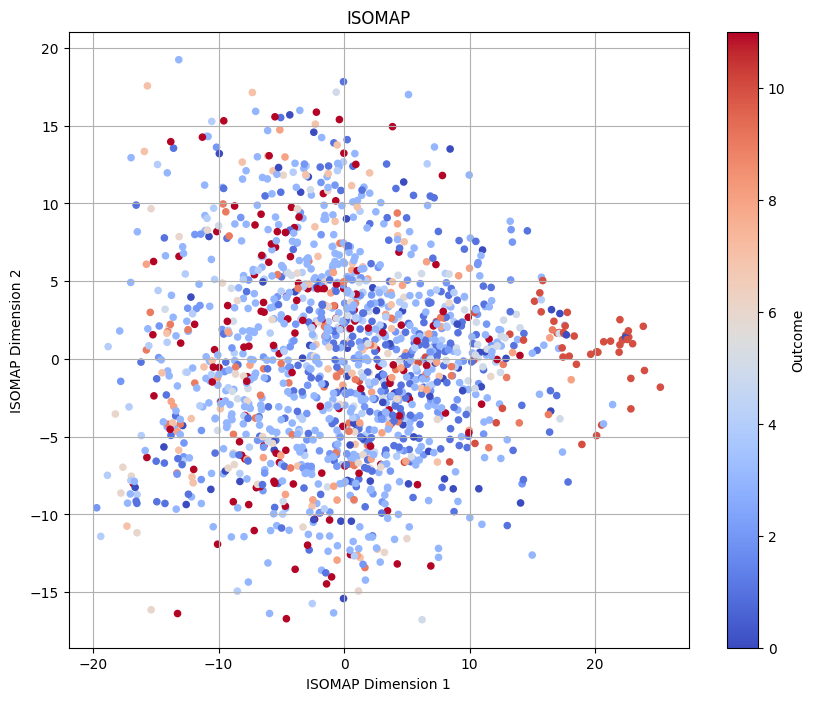

In [13]:
isomap = Isomap(n_components=2)
X_isomap = isomap.fit_transform(X)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c=y, cmap='coolwarm', s=20)
plt.colorbar(scatter, label="Outcome")
plt.title("ISOMAP")
plt.xlabel("ISOMAP Dimension 1")
plt.ylabel("ISOMAP Dimension 2")
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


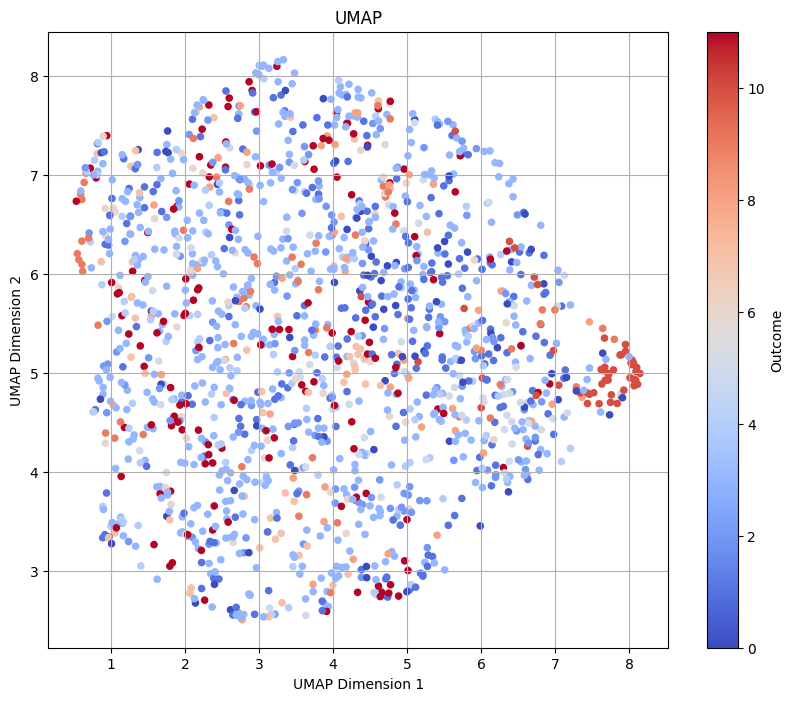

In [14]:
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='coolwarm', s=20)
plt.colorbar(scatter, label="Outcome")
plt.title("UMAP")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.grid(True)
plt.show()

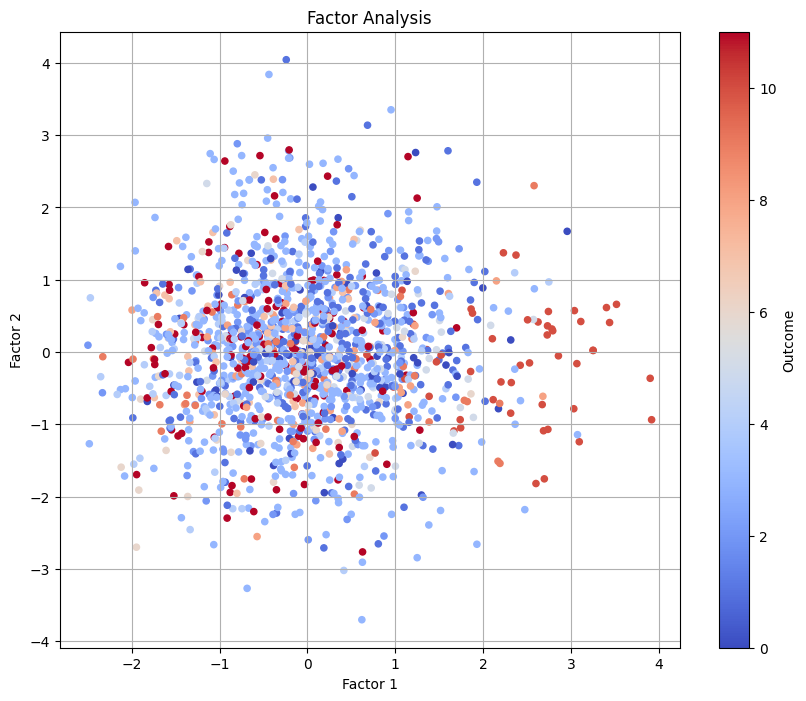

In [15]:
factor_analysis = FactorAnalysis(n_components=2, random_state=42)
X_fa = factor_analysis.fit_transform(X)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_fa[:, 0], X_fa[:, 1], c=y, cmap='coolwarm', s=20)
plt.colorbar(scatter, label="Outcome")
plt.title("Factor Analysis")
plt.xlabel("Factor 1")
plt.ylabel("Factor 2")
plt.grid(True)
plt.show()

49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


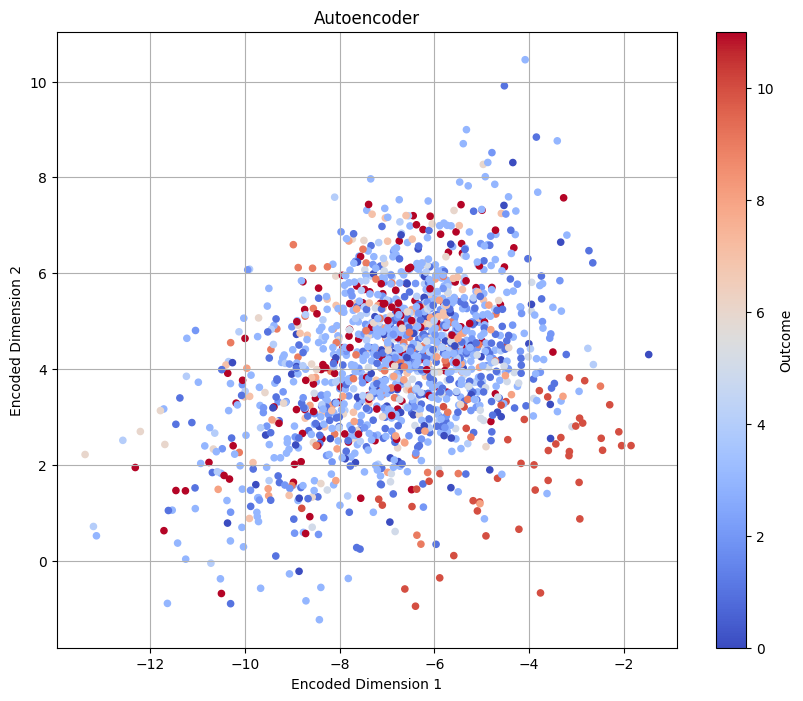

In [16]:
input_dimensions = X.shape[1]

input_layer = layers.Input(shape=(input_dimensions,))
encoded = layers.Dense(64, activation='relu')(input_layer)
encoded = layers.Dense(32, activation='relu')(encoded)
encoded_output = layers.Dense(2, activation='linear')(encoded)

decoded = layers.Dense(32, activation='relu')(encoded_output)
decoded = layers.Dense(64, activation='relu')(decoded)
decoded_output = layers.Dense(input_dimensions, activation='sigmoid')(decoded)

autoencoder = models.Model(inputs=input_layer, outputs=decoded_output)
encoder = models.Model(inputs=input_layer, outputs=encoded_output)

autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X, X, epochs=50, batch_size=32, shuffle=True, verbose=0)

X_autoencoder = encoder.predict(X)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_autoencoder[:, 0], X_autoencoder[:, 1], c=y, cmap='coolwarm', s=20)
plt.colorbar(scatter, label="Outcome")
plt.title("Autoencoder")
plt.xlabel("Encoded Dimension 1")
plt.ylabel("Encoded Dimension 2")
plt.grid(True)
plt.show()

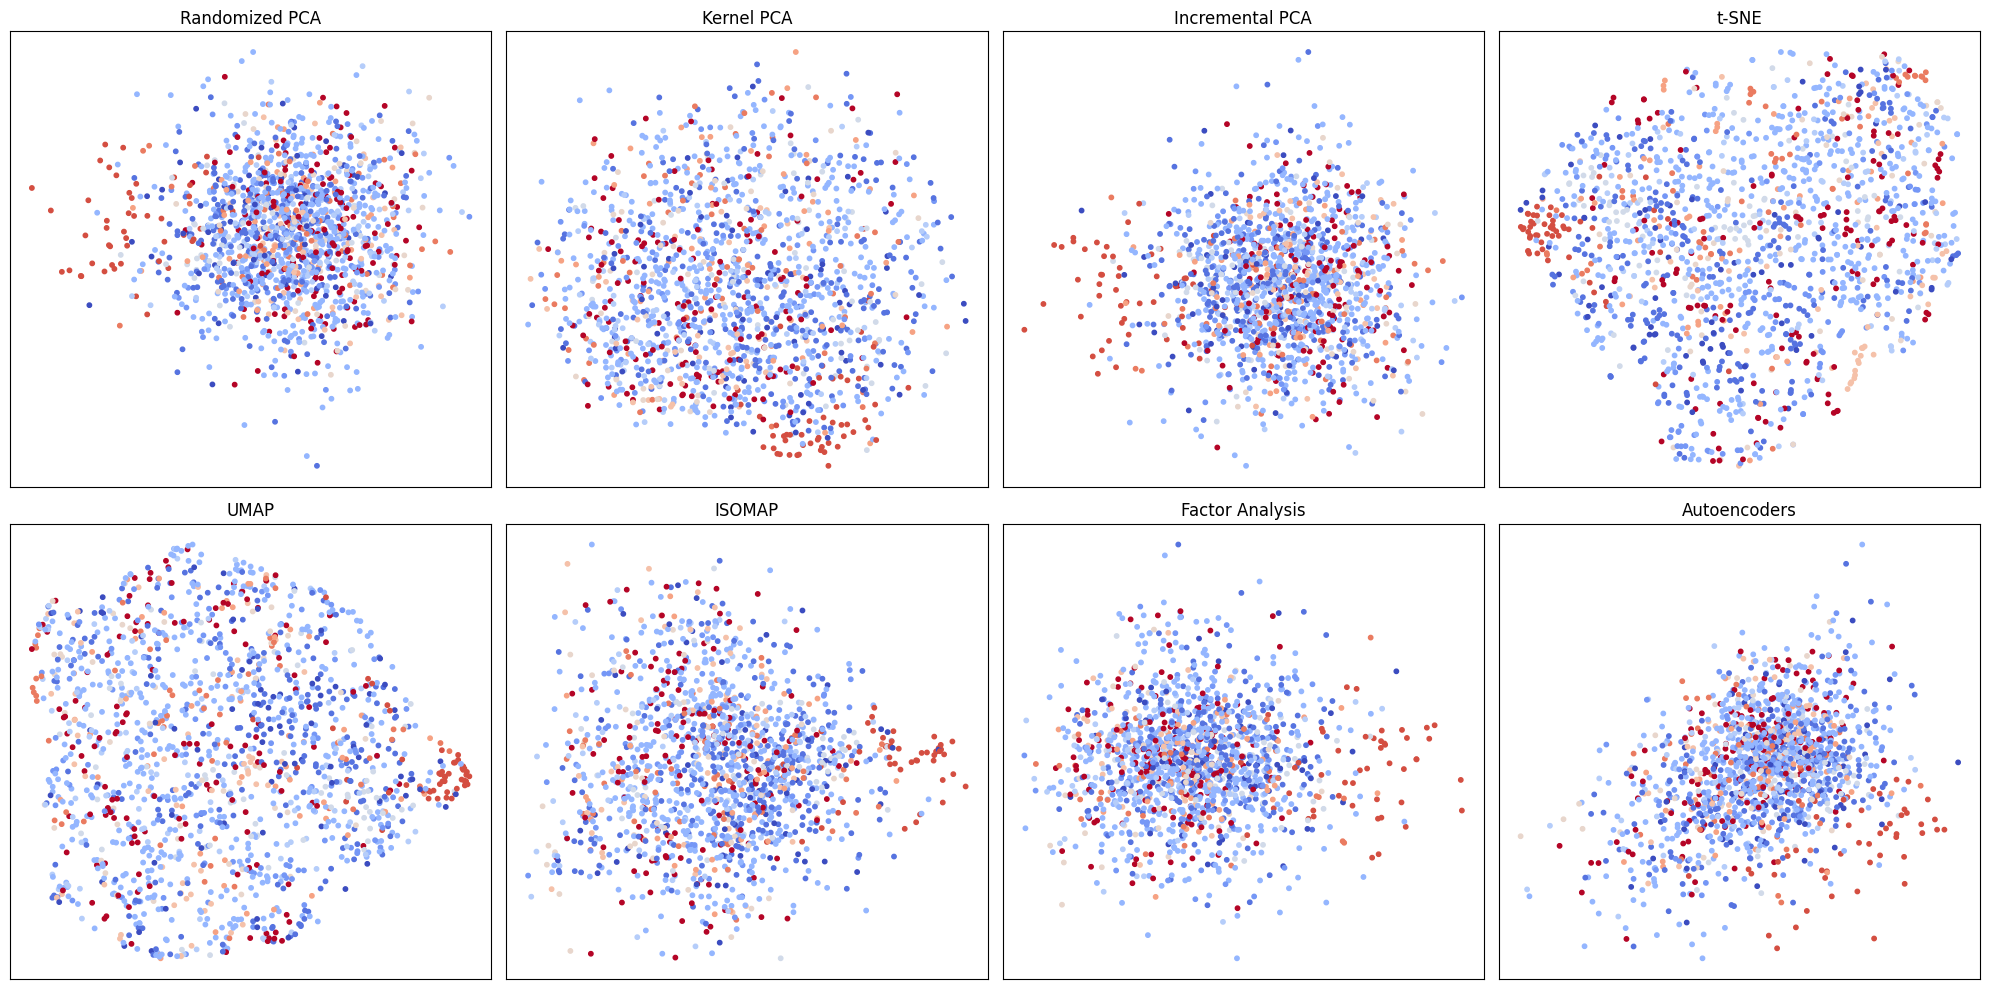

In [17]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
techniques = [
    ("Randomized PCA", X_rpca),
    ("Kernel PCA", X_kpca),
    ("Incremental PCA", X_ipca),
    ("t-SNE", X_tsne),
    ("UMAP", X_umap),
    ("ISOMAP", X_isomap),
    ("Factor Analysis", X_fa),
    ("Autoencoders", X_autoencoder),
]

for ax, (title, data) in zip(axes.flat, techniques):
    scatter = ax.scatter(data[:, 0], data[:, 1], c=y, cmap='coolwarm', s=10)
    ax.set_title(title)
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

## Summary

For all three PCA techniques, we can observe that the data points are densely packed, displaying minimal separation between the classes. Both Kernel PCA and Incremental PCA perform better than Randomized PCA due to their non-linear function. On the other hand, both t-SNE and UMAP performed better by showing some distinct clusters. ISOMAP, Factor Analysis, and Autoencoders faced similar issues due to significant overlap between clusters.